<a href="https://colab.research.google.com/github/iamBehzad/Deep-Learning-Tensorflow-Keras/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install keras-tuner

In [4]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#import necessary libraries

In [5]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from keras import metrics
import keras_tuner

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#EDA

In [6]:
df=pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


#EDA

In [7]:
print ('\n======================================= ((((( 5 Sample Records ))))) =======================================\n')
print(df.sample(5))

print ('\n======================================= ((((( Information of DataFrame ))))) =======================================\n')
print(df.info())

print ('\n======================================= ((((( Statistical description ))))) =======================================\n')
print(df.describe())

print ('\n======================================= ((((( Shape Of DataFrame ))))) =======================================\n')
print(df.shape)

print ('\n======================================= ((((( Columns Of DataFrame ))))) =======================================\n')
print(df.columns)

print ('\n======================================= ((((( Type Of DataFrame ))))) =======================================\n')
print(df.dtypes)

print ('\n=========================== ((((( Identifying the unique number of values in DataFrame ))))) ===========================\n')
print(df.nunique())

print ('\n=================================== ((((( correlation between the features ))))) ===================================\n')
corr = df.corr()
print(corr)



======================================= ((((( 5 Sample Records ))))) =======================================

     car_ID  symboling               CarName fueltype aspiration doornumber  \
96       97          1          nissan latio      gas        std       four   
82       83          3  mitsubishi outlander      gas      turbo        two   
90       91          1           nissan gt-r   diesel        std        two   
195     196         -1           volvo 144ea      gas        std       four   
23       24          1            dodge d200      gas      turbo        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
96       sedan        fwd          front       94.5  ...          97   
82   hatchback        fwd          front       95.9  ...         156   
90       sedan        fwd          front       94.5  ...         103   
195      wagon        rwd          front      104.3  ...         141   
23   hatchback        fwd          front       93.7  .

<ipython-input-7-2f88082aeba7>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


## Data Preprocessing

In [8]:
print ('\n=================================== ((((( missing values in DataFrame ))))) ===================================\n')
print(df.isnull().sum())

print ('\n=================================== ((((( There is no Missing Values ))))) ===================================\n')

X=df.drop(['price'], axis=1)
Y=df['price']


le = LabelEncoder()
X['CarName'] = le.fit_transform(X['CarName'])
X['fueltype'] = le.fit_transform(X['fueltype'])
X['aspiration'] = le.fit_transform(X['aspiration'])
X['doornumber'] = le.fit_transform(X['doornumber'])
X['carbody'] = le.fit_transform(X['carbody'])
X['drivewheel'] = le.fit_transform(X['drivewheel'])
X['enginelocation'] = le.fit_transform(X['enginelocation'])
X['enginetype'] = le.fit_transform(X['enginetype'])
X['cylindernumber'] = le.fit_transform(X['cylindernumber'])
X['fuelsystem'] = le.fit_transform(X['fuelsystem'])
X['CarName'] = le.fit_transform(X['CarName'])
X['fueltype'] = le.fit_transform(X['fueltype'])


print ('\n======================================= ((((( Type Of X DataFrame ))))) =======================================\n')
print(X.dtypes)

print ('\n======================================= ((((( Type Of Y DataFrame ))))) =======================================\n')
print(Y.dtypes)

print ('\n=================================== ((((( There is no object values ))))) ===================================\n')


=================================== ((((( missing values in DataFrame ))))) ===================================

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

=================================== ((((( There is no Missing Values ))))) ===================================


======================================= ((((( Type Of X DataFrame ))))) =======================================

car_ID                int64
symboling             int64
CarName           

## Strorytelling - Visualization


============================== (((((the heatmap of correlation between the features ))))) ============================


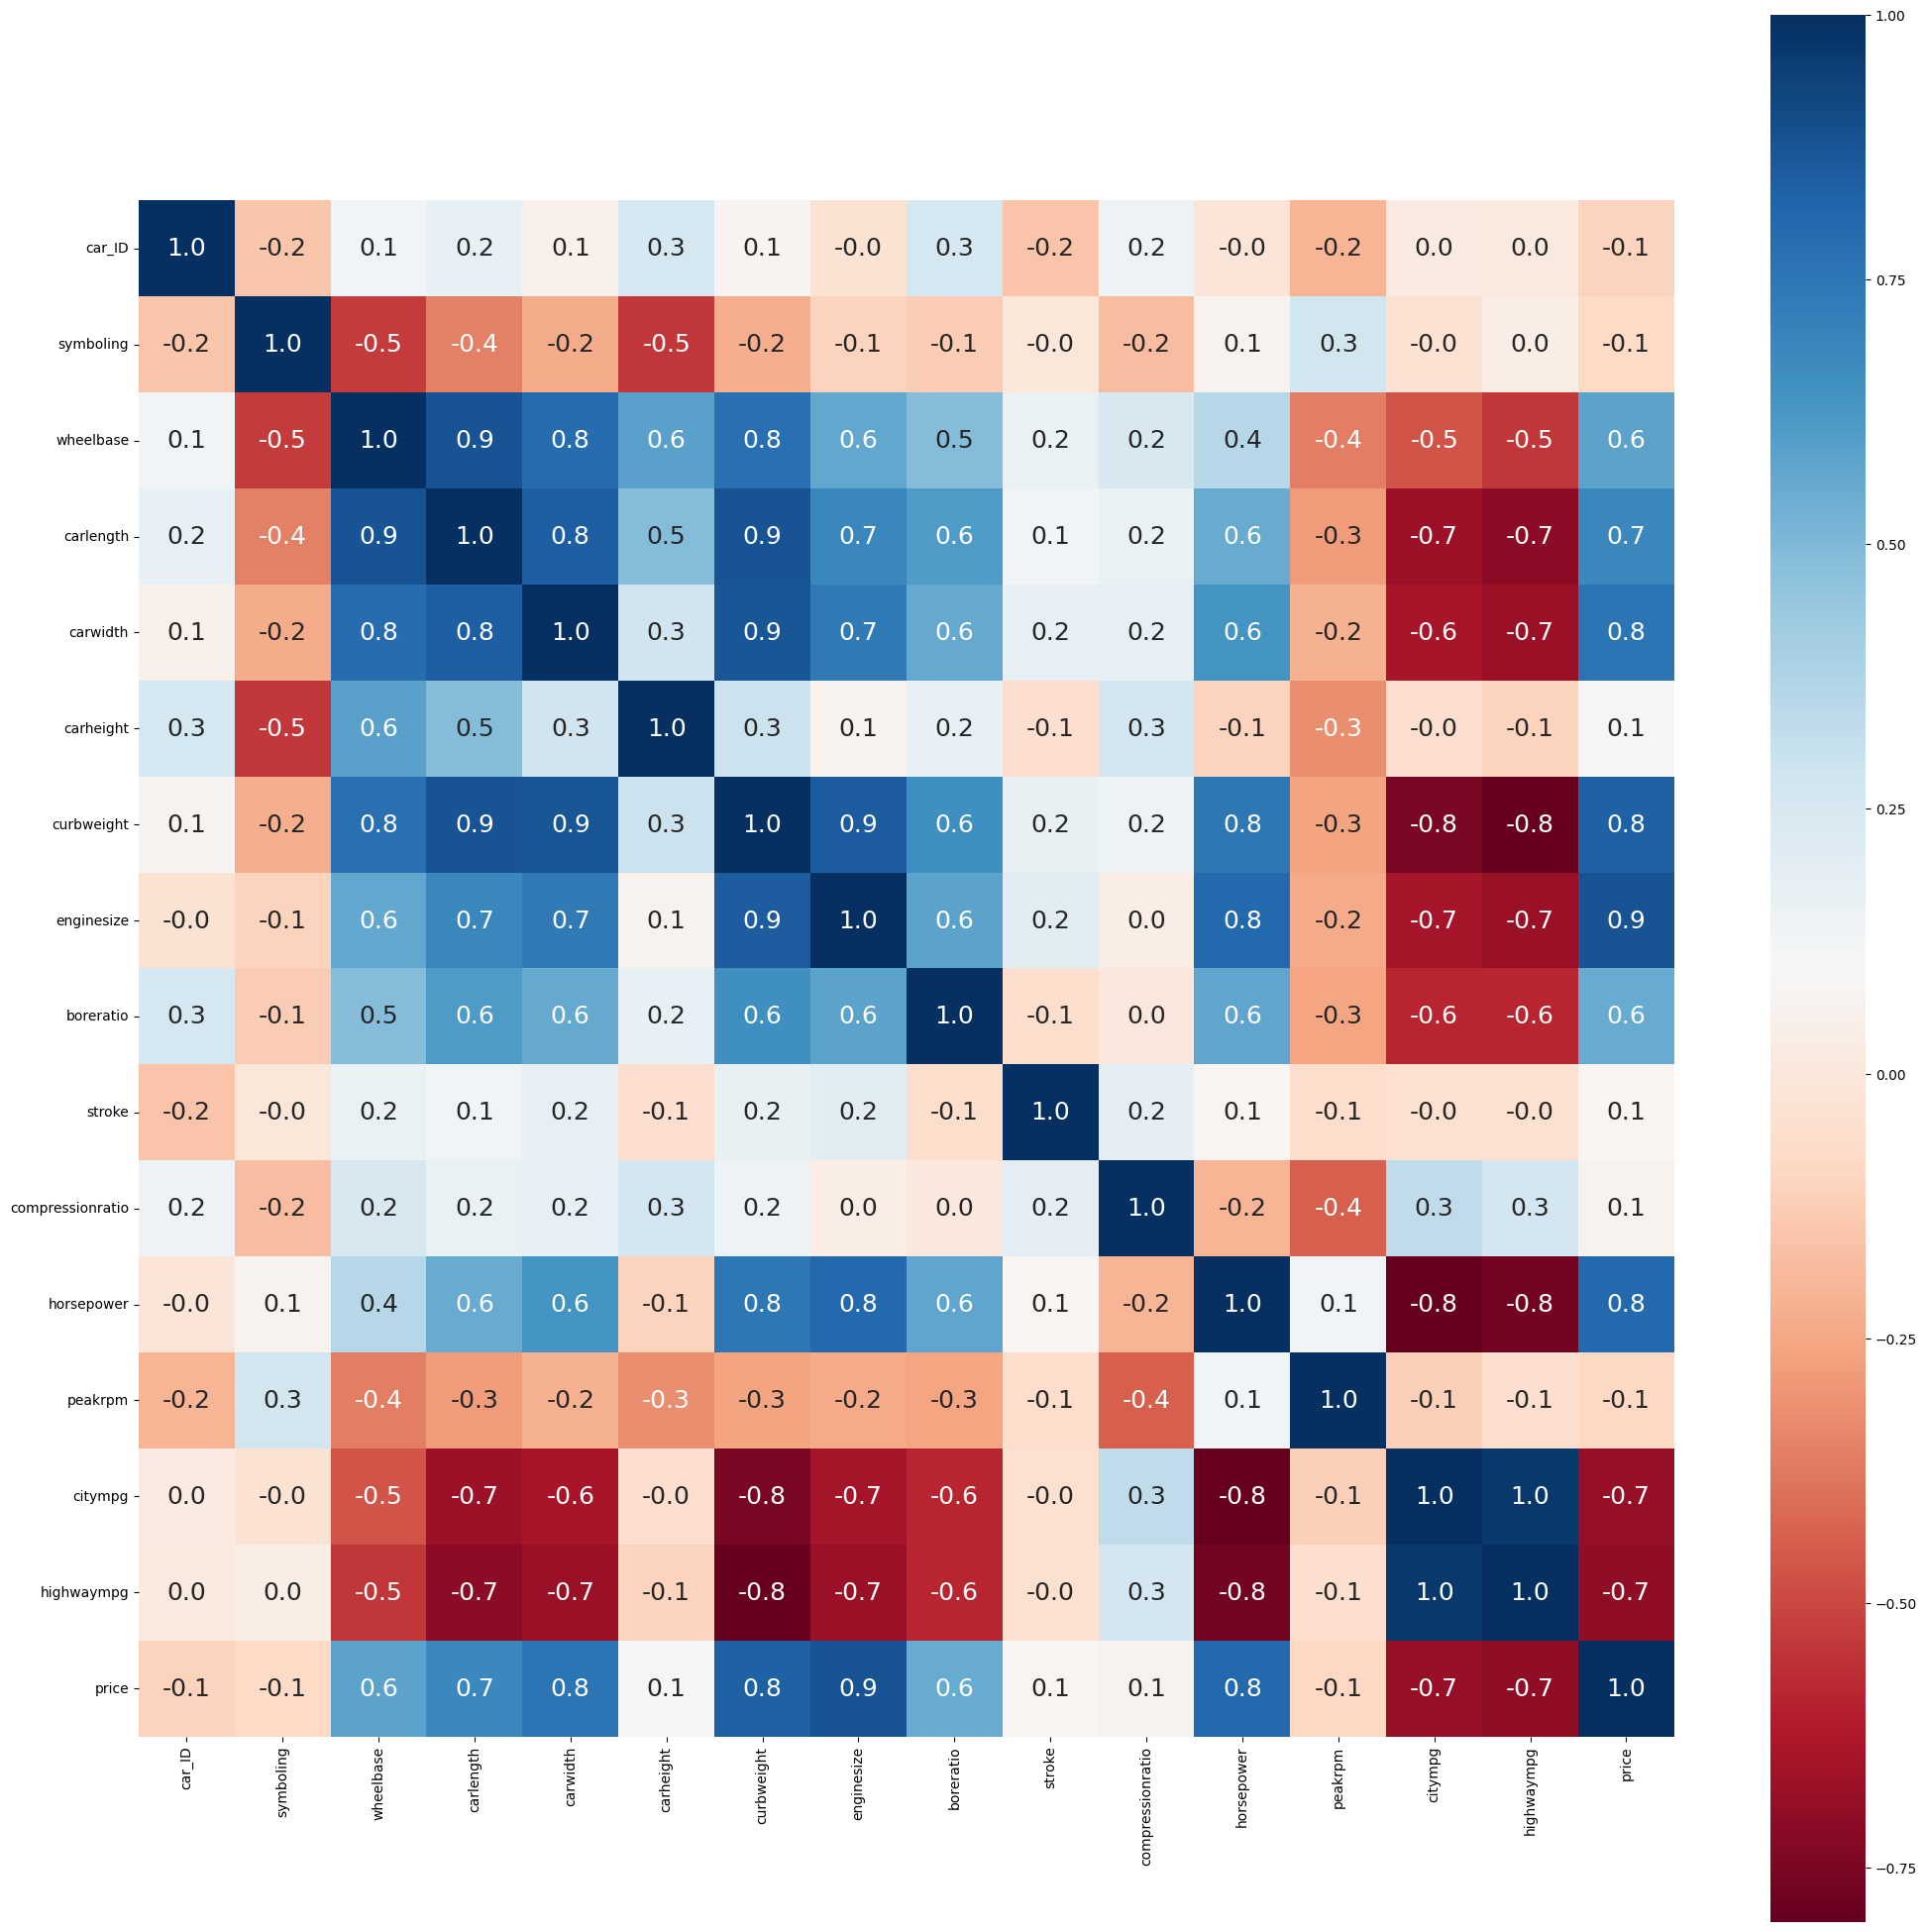

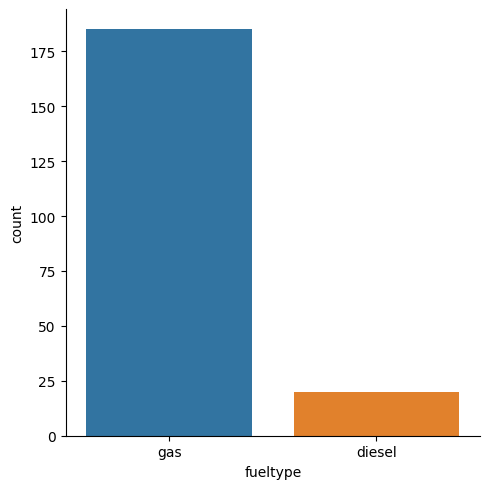

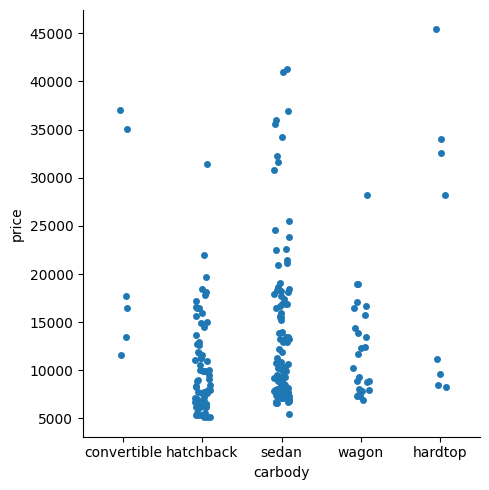

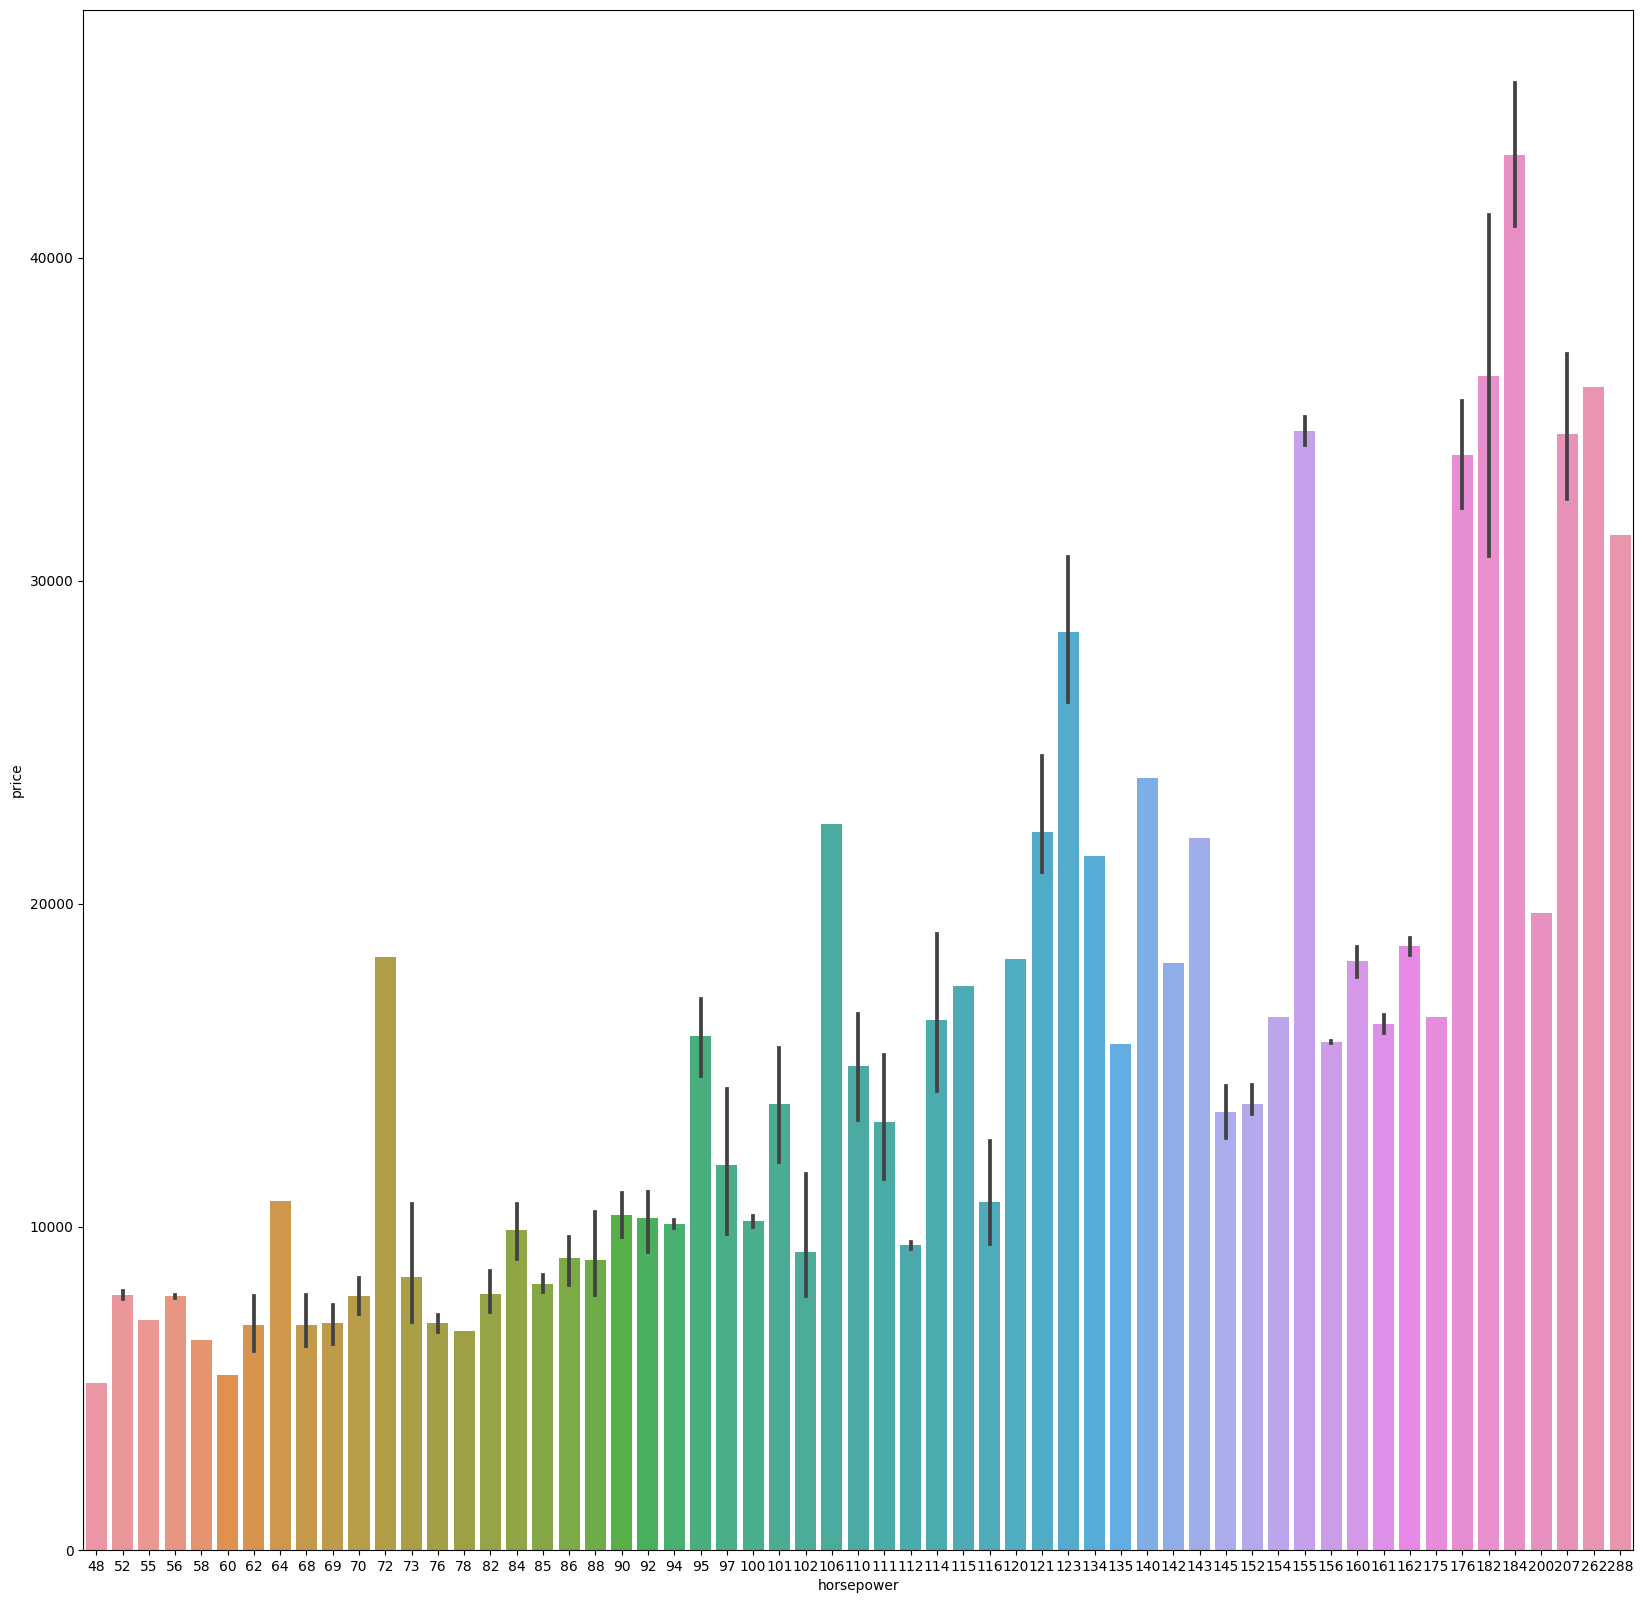

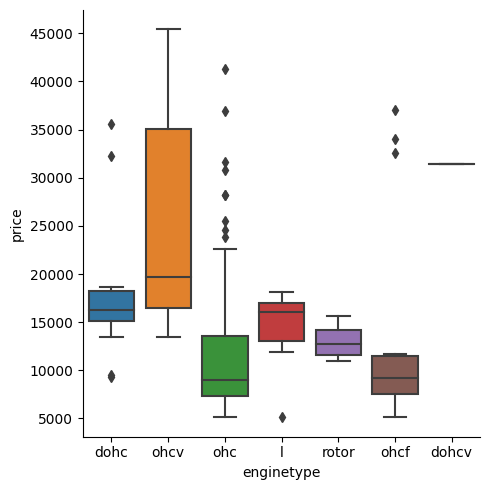

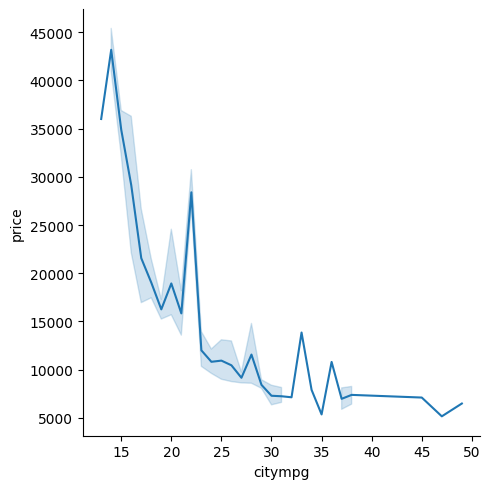

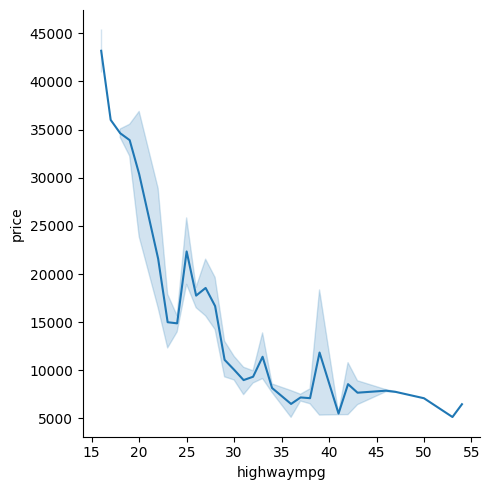

In [9]:
print ('\n============================== (((((the heatmap of correlation between the features ))))) ============================')
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':18}, cmap='RdBu');

sns.catplot(x='fueltype' ,kind="count",data=df);
sns.catplot(x='carbody' ,y="price", data=df);
plt.figure(figsize=(20,20))
sns.barplot(x="horsepower", y="price", data=df);
sns.catplot(x="enginetype", y="price", kind="box", data=df);
sns.relplot(x="citympg", y="price", kind="line", data=df);
sns.relplot(x="highwaympg", y="price", kind="line", data=df);

#Split data to test and train (85%-15%)

In [10]:
x_train0, x_test, y_train0, y_test = train_test_split(X,Y,test_size=0.15 )
x_train1, x_val, y_train1, y_val = train_test_split(x_train0,y_train0)

print("X_train1.shape = ",x_train1.shape)
print("y_train1.shape = ",y_train1.shape)
print("\nX_val.shape = ",x_val.shape)
print("y_val.shape = ",y_val.shape)
print("\nX_test.shape = ",x_test.shape)
print("y_test.shape = ",y_test.shape)

X_train1.shape =  (130, 25)
y_train1.shape =  (130,)

X_val.shape =  (44, 25)
y_val.shape =  (44,)

X_test.shape =  (31, 25)
y_test.shape =  (31,)


#Normalize data

In [11]:
SC=StandardScaler()
x_train1_s = SC.fit_transform(x_train1)
x_val_s = SC.fit_transform(x_val)
x_test_s = SC.fit_transform(x_test)

#Define keras model with 2 hidden layer

In [12]:
model = keras.models.Sequential([
  keras.layers.Dense(50, activation ="relu"),
  keras.layers.Dense(10, activation='relu'),
  keras.layers.Dense(1)
])

In [13]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[metrics.RootMeanSquaredError(),metrics.MeanAbsoluteError()])

In [14]:
history=model.fit(x_train1_s,y_train1, epochs=100, validation_data=(x_val_s,y_val))

Epoch 1/100
5/5 [==============================] - 8s 156ms/step - loss: 254356336.0000 - root_mean_squared_error: 15948.5527 - mean_absolute_error: 13537.5625 - val_loss: 204149664.0000 - val_root_mean_squared_error: 14288.0947 - val_mean_absolute_error: 12575.2783
Epoch 2/100
5/5 [==============================] - 0s 22ms/step - loss: 254348992.0000 - root_mean_squared_error: 15948.3223 - mean_absolute_error: 13537.3496 - val_loss: 204144784.0000 - val_root_mean_squared_error: 14287.9238 - val_mean_absolute_error: 12575.1035
Epoch 3/100
5/5 [==============================] - 0s 29ms/step - loss: 254343024.0000 - root_mean_squared_error: 15948.1348 - mean_absolute_error: 13537.1768 - val_loss: 204140128.0000 - val_root_mean_squared_error: 14287.7607 - val_mean_absolute_error: 12574.9365
Epoch 4/100
5/5 [==============================] - 0s 25ms/step - loss: 254337712.0000 - root_mean_squared_error: 15947.9688 - mean_absolute_error: 13537.0156 - val_loss: 204135568.0000 - val_root_mean

In [15]:
print(history.history)

{'loss': [254356336.0, 254348992.0, 254343024.0, 254337712.0, 254332576.0, 254327632.0, 254322160.0, 254316400.0, 254310448.0, 254304208.0, 254297280.0, 254289312.0, 254281264.0, 254272608.0, 254262944.0, 254252544.0, 254241648.0, 254229840.0, 254218464.0, 254205584.0, 254190832.0, 254175648.0, 254159200.0, 254138944.0, 254119920.0, 254097872.0, 254076784.0, 254054096.0, 254028912.0, 254001248.0, 253973072.0, 253942336.0, 253907600.0, 253872928.0, 253828304.0, 253787552.0, 253744800.0, 253700688.0, 253651584.0, 253601584.0, 253546688.0, 253487456.0, 253421696.0, 253355552.0, 253279344.0, 253200608.0, 253119536.0, 253042096.0, 252955520.0, 252861408.0, 252763136.0, 252655136.0, 252546544.0, 252431632.0, 252311584.0, 252183376.0, 252033536.0, 251888944.0, 251745072.0, 251599904.0, 251427936.0, 251262416.0, 251097584.0, 250924192.0, 250747968.0, 250576112.0, 250393952.0, 250197392.0, 249979856.0, 249754224.0, 249533296.0, 249303232.0, 249083728.0, 248837424.0, 248565536.0, 248298112.0, 24

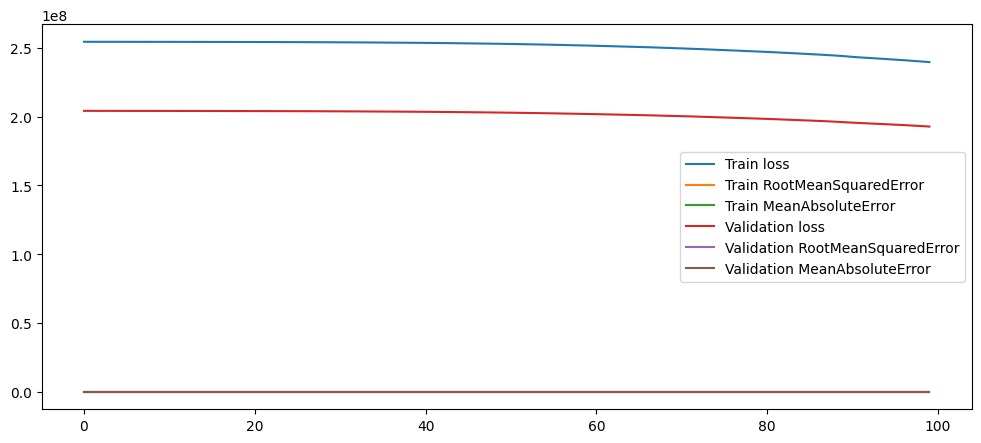

In [16]:
fig, ax = plt.subplots(figsize=(12, 5))
#ax.set_yscale('log')
ax.plot(history.history['loss'], label='Train loss')
ax.plot(history.history['root_mean_squared_error'], label='Train RootMeanSquaredError')
ax.plot(history.history['mean_absolute_error'], label='Train MeanAbsoluteError')
ax.plot(history.history['val_loss'], label='Validation loss')
ax.plot(history.history['val_root_mean_squared_error'], label='Validation RootMeanSquaredError')
ax.plot(history.history['val_mean_absolute_error'], label='Validation MeanAbsoluteError')
ax.legend();

In [17]:
# evaluate the model
eval=model.evaluate(x_test_s, y_test, verbose=0, return_dict=True)
print(eval)

{'loss': 215847344.0, 'root_mean_squared_error': 14691.744140625, 'mean_absolute_error': 12805.3076171875}


#Hyperparameter optimization with keras tuner

In [18]:
def build_model(hp):
    model = keras.Sequential()
    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units1", min_value=10, max_value=500, step=100),
            # Tune the activation function to use.
            activation=hp.Choice("activation1", ["relu", "tanh"]),
        )
    )

    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units2", min_value=10, max_value=500, step=100),
            # Tune the activation function to use.
            activation=hp.Choice("activation2", ["relu", "tanh"]),
        )
    )

    model.add(layers.Dense(1))

    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mean_squared_error",
        metrics=[metrics.RootMeanSquaredError(),metrics.MeanAbsoluteError()],
    )
    return model

build_model(keras_tuner.HyperParameters())

In [19]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_mean_absolute_error",
    max_trials=10,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search_space_summary()

Search space summary
Default search space size: 5
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 500, 'step': 100, 'sampling': 'linear'}
activation1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 500, 'step': 100, 'sampling': 'linear'}
activation2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [20]:
tuner.search(x_train1_s, y_train1, epochs=2, validation_data=(x_val_s, y_val))

Trial 10 Complete [00h 00m 03s]
val_mean_absolute_error: 12573.81884765625

Best val_mean_absolute_error So Far: 12553.595703125
Total elapsed time: 00h 00m 51s


In [21]:
tuner.results_summary()

Results summary
Results in my_dir/helloworld
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 03 summary
Hyperparameters:
units1: 210
activation1: relu
units2: 410
activation2: relu
lr: 0.0028156208463983876
Score: 12553.595703125

Trial 01 summary
Hyperparameters:
units1: 310
activation1: relu
units2: 110
activation2: tanh
lr: 0.0004715905554018508
Score: 12572.23046875

Trial 05 summary
Hyperparameters:
units1: 410
activation1: tanh
units2: 110
activation2: relu
lr: 0.0007036121313527428
Score: 12573.447265625

Trial 06 summary
Hyperparameters:
units1: 410
activation1: tanh
units2: 410
activation2: relu
lr: 0.000589358031504996
Score: 12573.453125

Trial 07 summary
Hyperparameters:
units1: 410
activation1: tanh
units2: 110
activation2: relu
lr: 0.0003913279201967468
Score: 12573.7294921875

Trial 02 summary
Hyperparameters:
units1: 310
activation1: relu
units2: 310
activation2: tanh
lr: 0.00015318039477051564
Score: 12573.73828125

Trial 09 sum

#Build and fit Best model found by keras-tuner

In [22]:
# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(5)
print(best_hps[0].values)
# Build the model with the best hp.
best_model = build_model(best_hps[0])

{'units1': 210, 'activation1': 'relu', 'units2': 410, 'activation2': 'relu', 'lr': 0.0028156208463983876}


In [23]:
best_model_history = best_model.fit(x_train1_s,y_train1, epochs=100, validation_data=(x_val_s,y_val))

Epoch 1/100
5/5 [==============================] - 1s 44ms/step - loss: 254278048.0000 - root_mean_squared_error: 15946.0977 - mean_absolute_error: 13535.1172 - val_loss: 203916864.0000 - val_root_mean_squared_error: 14279.9463 - val_mean_absolute_error: 12566.9941
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 253955728.0000 - root_mean_squared_error: 15935.9883 - mean_absolute_error: 13525.5361 - val_loss: 203520416.0000 - val_root_mean_squared_error: 14266.0576 - val_mean_absolute_error: 12553.0771
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 253370416.0000 - root_mean_squared_error: 15917.6133 - mean_absolute_error: 13508.5088 - val_loss: 202840848.0000 - val_root_mean_squared_error: 14242.2207 - val_mean_absolute_error: 12529.7041
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 252400896.0000 - root_mean_squared_error: 15887.1299 - mean_absolute_error: 13481.4053 - val_loss: 201740272.0000 - val_root_mean_

In [24]:
best_model.summary()
print(best_model_history.history)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 210)               5460      
                                                                 
 dense_4 (Dense)             (None, 410)               86510     
                                                                 
 dense_5 (Dense)             (None, 1)                 411       
                                                                 
Total params: 92,381
Trainable params: 92,381
Non-trainable params: 0
_________________________________________________________________
{'loss': [254278048.0, 253955728.0, 253370416.0, 252400896.0, 250889184.0, 248689776.0, 245505056.0, 241000000.0, 234590592.0, 225898688.0, 214640752.0, 200496224.0, 183711904.0, 162747040.0, 142151648.0, 118240576.0, 94145464.0, 70590952.0, 52222092.0, 36533196.0, 27199570.0, 22726774.0, 21034318.0, 20039770.0, 

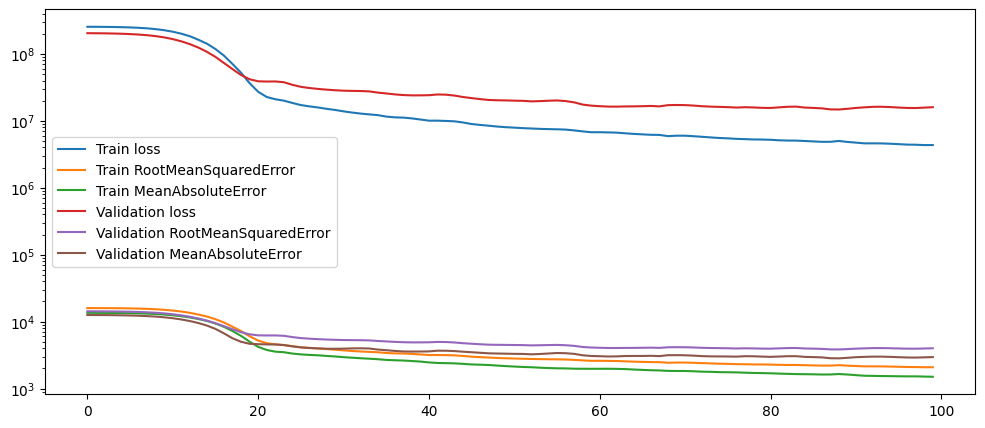

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_yscale('log')
ax.plot(best_model_history.history['loss'], label='Train loss')
ax.plot(best_model_history.history['root_mean_squared_error'], label='Train RootMeanSquaredError')
ax.plot(best_model_history.history['mean_absolute_error'], label='Train MeanAbsoluteError')
ax.plot(best_model_history.history['val_loss'], label='Validation loss')
ax.plot(best_model_history.history['val_root_mean_squared_error'], label='Validation RootMeanSquaredError')
ax.plot(best_model_history.history['val_mean_absolute_error'], label='Validation MeanAbsoluteError')
ax.legend();

In [26]:
# evaluate the model
eval=best_model.evaluate(x_test_s, y_test, verbose=0, return_dict=True)
print(eval)

{'loss': 6707551.5, 'root_mean_squared_error': 2589.89404296875, 'mean_absolute_error': 2054.498046875}


#Define 5 different model with different number of neurons 

In [27]:
y_test.shape

(31,)

In [28]:
No_neurons=[50,200,300,400,500]

history=[]
min_train_mae=[]
min_val_mae=[]
test_mae=[]

for n in No_neurons:
  model = keras.models.Sequential([
    keras.layers.Dense(n, activation ="relu"),
    keras.layers.Dense(1)
  ])
  model.compile(loss="mean_squared_error", optimizer="adam", metrics=[metrics.MeanAbsoluteError()])

  h=model.fit(x_train1_s,y_train1, epochs=100, validation_data=(x_val_s,y_val))
  history.append(h)
  min_train_mae.append(min(h.history['mean_absolute_error']))
  min_val_mae.append(min(h.history['val_mean_absolute_error']))
  m=model.evaluate(x_test_s, y_test, verbose=0)
  test_mae.append(m[1])


Epoch 1/100
5/5 [==============================] - 1s 35ms/step - loss: 254336576.0000 - mean_absolute_error: 13537.1943 - val_loss: 204132352.0000 - val_mean_absolute_error: 12574.9180
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 254329264.0000 - mean_absolute_error: 13537.0195 - val_loss: 204126736.0000 - val_mean_absolute_error: 12574.7529
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 254322256.0000 - mean_absolute_error: 13536.8506 - val_loss: 204121088.0000 - val_mean_absolute_error: 12574.5820
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 254315296.0000 - mean_absolute_error: 13536.6797 - val_loss: 204115520.0000 - val_mean_absolute_error: 12574.4150
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 254308048.0000 - mean_absolute_error: 13536.5039 - val_loss: 204109888.0000 - val_mean_absolute_error: 12574.2412
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss:

In [29]:
#lst=[min(history.history['mean_absolute_error']) for history in history]
print(min_train_mae)
print(min_val_mae)
print(test_mae)

[13475.0322265625, 13231.5537109375, 13091.560546875, 12888.26953125, 12794.078125]
[12513.28125, 12270.7724609375, 12131.7470703125, 11927.0224609375, 11834.0380859375]
[13120.5322265625, 12888.333984375, 12760.1435546875, 12563.4111328125, 12475.720703125]


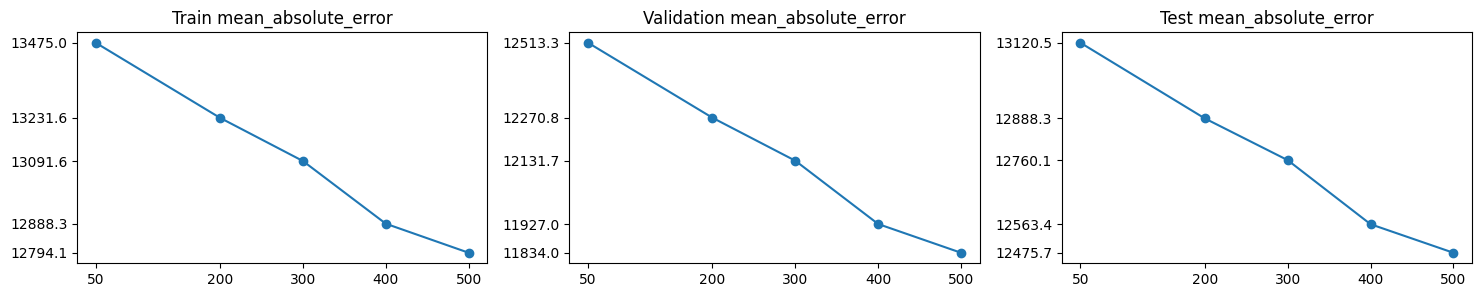

In [30]:
plt.figure(figsize=[18,3])

plt.subplot(1,3,1),plt.plot(No_neurons,min_train_mae,marker="o"),
plt.title('Train mean_absolute_error' ,fontsize=12), plt.xticks(No_neurons), plt.yticks(min_train_mae)

plt.subplot(1,3,2),plt.plot(No_neurons,min_val_mae,marker="o"),
plt.title('Validation mean_absolute_error' ,fontsize=12), plt.xticks(No_neurons), plt.yticks(min_val_mae)

plt.subplot(1,3,3),plt.plot(No_neurons,test_mae, marker="o"),
plt.title('Test mean_absolute_error' ,fontsize=12), plt.xticks(No_neurons), plt.yticks(test_mae);

In [31]:
y_val

59      8845.0
86      8189.0
138     5118.0
32      5399.0
35      7295.0
177    11248.0
156     6938.0
0      13495.0
199    18950.0
130     9295.0
122     7609.0
183     7975.0
19      6295.0
151     6338.0
128    37028.0
203    22470.0
92      6849.0
165     9298.0
117    18150.0
133    12170.0
66     18344.0
96      7499.0
108    13200.0
178    16558.0
58     15645.0
101    13499.0
111    15580.0
173     8948.0
79      7689.0
3      13950.0
95      7799.0
89      5499.0
106    18399.0
171    11549.0
44      8916.5
137    18620.0
65     18280.0
189    11595.0
201    19045.0
127    34028.0
146     7463.0
98      8249.0
191    13295.0
174    10698.0
Name: price, dtype: float64

#Define 4 different model with different number of layers 

In [32]:
from keras import backend as K
import gc

No_layer=[1,2,5,7]

history=[]
min_train_mae=[]
min_val_mae=[]
test_mae=[]

for i in range(4):
  model = keras.models.Sequential()
  for j in range(No_layer[i]+1):
    model.add(keras.layers.Dense(100, activation="relu"))
  model.add(keras.layers.Dense(1))

  model.compile(loss="mean_squared_error", optimizer="adam", metrics=[metrics.MeanAbsoluteError()])

  h=model.fit(x_train1_s,y_train1, epochs=100, validation_data=(x_val_s,y_val))

  print(model.summary())

  history.append(h)
  min_train_mae.append(min(h.history['mean_absolute_error']))
  min_val_mae.append(min(h.history['val_mean_absolute_error']))
  m=model.evaluate(x_test_s, y_test, verbose=0)
  test_mae.append(m[1])


Epoch 1/100
5/5 [==============================] - 1s 39ms/step - loss: 254364336.0000 - mean_absolute_error: 13537.7744 - val_loss: 204141312.0000 - val_mean_absolute_error: 12574.9248
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 254332896.0000 - mean_absolute_error: 13536.8574 - val_loss: 204116640.0000 - val_mean_absolute_error: 12574.0752
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 254306320.0000 - mean_absolute_error: 13536.0303 - val_loss: 204091952.0000 - val_mean_absolute_error: 12573.2197
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 254279168.0000 - mean_absolute_error: 13535.1816 - val_loss: 204065328.0000 - val_mean_absolute_error: 12572.2871
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 254246784.0000 - mean_absolute_error: 13534.2178 - val_loss: 204034288.0000 - val_mean_absolute_error: 12571.2061
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss:

In [33]:
print(min_train_mae)
print(min_val_mae)
print(test_mae)

[5874.109375, 1788.408935546875, 1025.92431640625, 1012.166015625]
[5574.8203125, 2960.72265625, 2497.798583984375, 2456.1962890625]
[6061.4970703125, 2208.190185546875, 2060.73974609375, 1830.5311279296875]


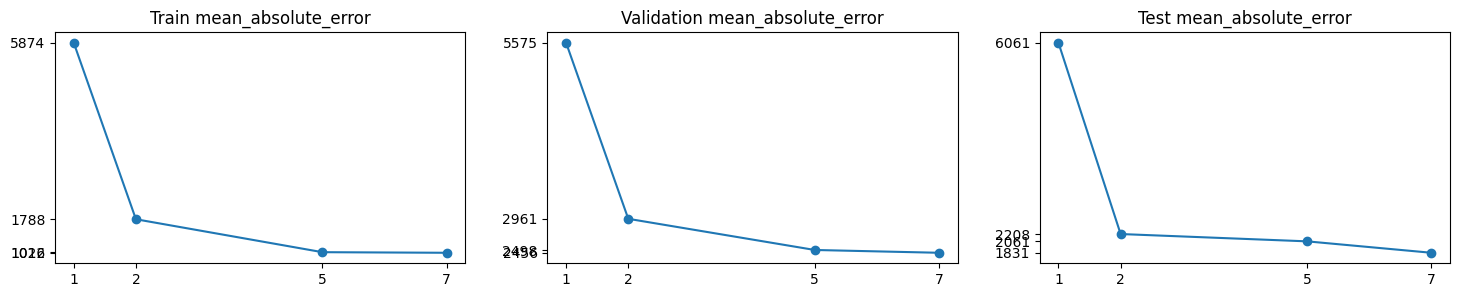

In [34]:
plt.figure(figsize=[18,3])

plt.subplot(1,3,1),plt.plot(No_layer,min_train_mae,marker="o"),
plt.title('Train mean_absolute_error' ,fontsize=12), plt.xticks(No_layer), plt.yticks(min_train_mae)

plt.subplot(1,3,2),plt.plot(No_layer,min_val_mae,marker="o"),
plt.title('Validation mean_absolute_error' ,fontsize=12), plt.xticks(No_layer), plt.yticks(min_val_mae)

plt.subplot(1,3,3),plt.plot(No_layer,test_mae, marker="o"),
plt.title('Test mean_absolute_error' ,fontsize=12), plt.xticks(No_layer), plt.yticks(test_mae);

#Build Wide and Deep Model

In [35]:
input_ = keras.layers.Input(25)
hidden_layer1=keras.layers.Dense(100,activation='relu')(input_)
hidden_layer2=keras.layers.Dense(75,activation='relu')(hidden_layer1)
concatenate_layer=keras.layers.Concatenate()([input_, hidden_layer2])
output=keras.layers.Dense(1)(concatenate_layer)
WD_model=keras.Model(inputs=[input_], outputs=[output])

In [36]:
WD_model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=[metrics.RootMeanSquaredError(),metrics.MeanAbsoluteError()])

In [37]:
WD_history = WD_model.fit(x_train1_s, y_train1, batch_size=32 , epochs=50, validation_data=[x_val_s, y_val])

Epoch 1/50
5/5 [==============================] - 1s 44ms/step - loss: 254351584.0000 - root_mean_squared_error: 15948.4033 - mean_absolute_error: 13537.0527 - val_loss: 204136256.0000 - val_root_mean_squared_error: 14287.6260 - val_mean_absolute_error: 12574.4561
Epoch 2/50
5/5 [==============================] - 0s 14ms/step - loss: 254333072.0000 - root_mean_squared_error: 15947.8232 - mean_absolute_error: 13536.4551 - val_loss: 204118928.0000 - val_root_mean_squared_error: 14287.0195 - val_mean_absolute_error: 12573.8604
Epoch 3/50
5/5 [==============================] - 0s 10ms/step - loss: 254313552.0000 - root_mean_squared_error: 15947.2109 - mean_absolute_error: 13535.8623 - val_loss: 204100704.0000 - val_root_mean_squared_error: 14286.3818 - val_mean_absolute_error: 12573.2305
Epoch 4/50
5/5 [==============================] - 0s 10ms/step - loss: 254293552.0000 - root_mean_squared_error: 15946.5840 - mean_absolute_error: 13535.2246 - val_loss: 204080368.0000 - val_root_mean_squa

In [38]:
WD_model.summary()
print(WD_history.history)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 dense_39 (Dense)               (None, 100)          2600        ['input_1[0][0]']                
                                                                                                  
 dense_40 (Dense)               (None, 75)           7575        ['dense_39[0][0]']               
                                                                                                  
 concatenate (Concatenate)      (None, 100)          0           ['input_1[0][0]',                
                                                                  'dense_40[0][0]']           

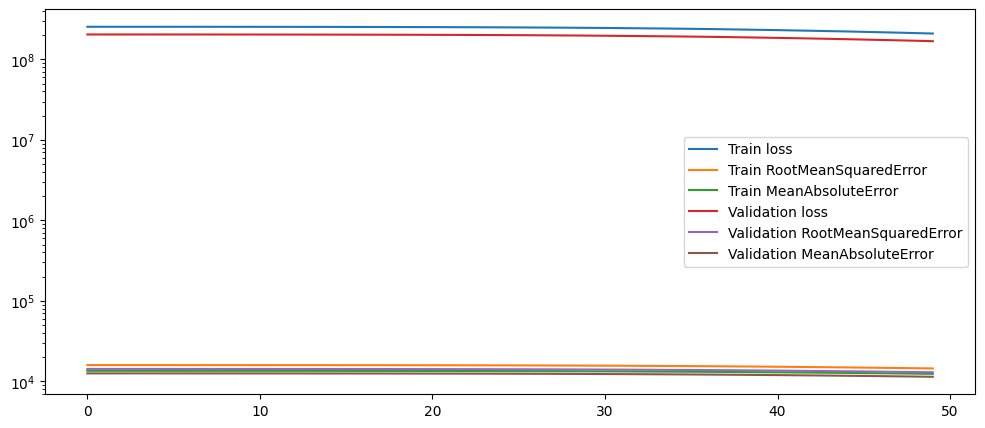

In [42]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_yscale('log')
ax.plot(WD_history.history['loss'], label='Train loss')
ax.plot(WD_history.history['root_mean_squared_error'], label='Train RootMeanSquaredError')
ax.plot(WD_history.history['mean_absolute_error'], label='Train MeanAbsoluteError')
ax.plot(WD_history.history['val_loss'], label='Validation loss')
ax.plot(WD_history.history['val_root_mean_squared_error'], label='Validation RootMeanSquaredError')
ax.plot(WD_history.history['val_mean_absolute_error'], label='Validation MeanAbsoluteError')
ax.legend();

In [40]:
# evaluate the model
eval=WD_model.evaluate(x_test_s, y_test, verbose=0, return_dict=True)
print(eval)

{'loss': 187813232.0, 'root_mean_squared_error': 13704.4970703125, 'mean_absolute_error': 12078.4404296875}
